Cameron Selci
202046538

Tely 10 success based on province and Fire times.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
df = pd.read_csv('tely10.csv')
df.head()

,year,name,bib,city,gun_time,chip_time,overall_place,gender_place,division,division_place
0,2019,Colin Fewer,3492,Paradise,0:49:49,0:49:49,1,1,LM40-44,1/170
1,2019,Graydon Snider,1477,Montreal,0:51:11,0:51:11,2,2,LM35-39,1/216
2,2019,Matt Noseworthy,2431,St. John's,0:51:13,0:51:13,3,3,LM20-24,1/83
3,2019,Blaine Penny,977,Calgary,0:53:42,0:53:40,4,4,LM45-49,1/161
4,2019,Anne Johnston,1653,St. John's,0:54:25,0:54:24,5,1,LF35-39,1/312


In [36]:
dfname = df.drop_duplicates(subset=['name', 'year'])
dfname = df[df.groupby('name').transform('size') == 15]
dfname= dfname.sort_values(by='name')
dfname

,year,name,bib,city,gun_time,chip_time,overall_place,gender_place,division,division_place
29323,2012,Alfred Power,1065,St. John's,1:36:03,1:35:32,1537,941,LM50-54,101/141
17783,2015,Alfred Power,1164,St. John's,1:27:18,1:25:39,1222,844,LM50-54,86/155
10031,2017,Alfred Power,991,St. John's,1:43:39,1:42:50,2175,1179,LM55-59,87/131
34911,2010,Alfred Power,724,St. John's,1:27:58,1:26:57,894,656,LM45-49,78/147
44614,2006,Alfred Power,633,St. John's,1:46:32,1:45:51,1435,825,LM45-49,145/159
...,...,...,...,...,...,...,...,...,...,...
45387,2005,Yvonne Martin,1231,St. Mary's,1:17:36,1:17:07,397,62,LF45-49,5/113
39492,2008,Yvonne Martin,125,St. Mary's,1:19:04,1:18:51,376,69,LF50-54,6/120
36988,2009,Yvonne Martin,9,St. Mary's,1:14:57,1:14:42,349,50,LF50-54,5/148
28098,2012,Yvonne Martin,313,St. Mary's,1:14:45,1:14:33,312,53,LF50-54,5/202


In [37]:
dfname.groupby('name').size().sort_values(ascending=False)

name
Alfred Power          15
Mary Pike             15
Joe Ryan              15
John Seymour          15
Judy Sheppard         15
Keith Peddle          15
Kevin Glynn           15
Kevin Peddle          15
Kevin Pender          15
Linda Hensman         15
Lisa Dobbin           15
Lorraine Singleton    15
Lou Ryan              15
Paul Cleary           15
Joan Bulgin           15
Paul Lahey            15
Paul Newhook          15
Peter Gammon          15
Peter Soucy           15
Ruby Martin           15
Scott Fitzgerald      15
Sharon Connolly       15
Stephen Nolan         15
Susan Kennedy         15
Tom Burke             15
Wayne Dillon          15
Joan Hartery          15
Jason White           15
Andrew Bruce          15
Chris Parrish         15
Ann Angel             15
Anthony Paul          15
Barbara Brenton       15
Bernadette Jerrett    15
Bernard Hynes         15
Bill Pomeroy          15
Bill Saunders         15
Brendan Veitch        15
Brian Reddick         15
Calvin Crant        

In [38]:
dfname.sort_values(by='overall_place', ascending=True)

,year,name,bib,city,gun_time,chip_time,overall_place,gender_place,division,division_place
16573,2015,Jason White,2175,Torbay,0:56:07,0:56:04,12,12,LM40-44,1/214
20702,2014,Jason White,3017,Torbay,0:57:06,0:57:06,13,12,LM35-39,3/222
24478,2013,Jason White,2783,Torbay,0:59:18,0:59:16,15,15,LM35-39,4/207
12226,2016,Jason White,4239,Torbay,0:56:59,0:56:59,15,14,LM40-44,1/201
39136,2008,Peter Soucy,1125,St. John's,1:02:07,1:02:05,19,17,LM45-49,5/158
...,...,...,...,...,...,...,...,...,...,...
16344,2016,Keith Peddle,1398,St. John's,2:42:16,2:39:29,4133,1668,LM65-69,59/66
12007,2017,Stephen Nolan,1018,St. John's,2:46:16,2:42:14,4151,1636,LM45-49,170/174
16392,2016,Wayne Dillon,1643,St. John's,2:47:57,2:43:38,4181,1681,LM60-64,117/125
16493,2016,Stephen Nolan,277,St. John's,3:01:02,2:57:18,4282,1702,LM45-49,158/160


In [39]:
# First, sort the DataFrame by 'year' in descending order.
dfsort = dfname.sort_values(by='year', ascending=False)

# Then, group by 'name' and apply the sorted order within each group.
dfsort = dfsort.groupby('name', sort=False).apply(lambda x: x).reset_index(drop=True)

# Then, group by 'name' and apply the sorted order within each group.
dfsort['better_than_prev'] = dfsort['chip_time'] < dfsort['chip_time'].shift(-1)

dfsort['better_than_prev'].loc[dfsort['year'] == 2005] = False
dfsort = dfsort.drop_duplicates(subset=['name', 'year'], keep='first')

dfsort.to_csv('tely10top50Repeats.csv')
dfsort


C:\Users\crsel\AppData\Local\Temp\ipykernel_25956\1878241121.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfsort = dfsort.groupby('name', sort=False).apply(lambda x: x).reset_index(drop=True)
C:\Users\crsel\AppData\Local\Temp\ipykernel_25956\1878241121.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are se

,year,name,bib,city,gun_time,chip_time,overall_place,gender_place,division,division_place,better_than_prev
0,2019,Mary Pike,1184,St. John's,1:58:32,1:56:34,2582,1306,LF60-64,46/116,True
1,2018,Mary Pike,2346,St. John's,2:07:02,2:05:33,3036,1658,LF60-64,55/117,False
2,2017,Mary Pike,2940,St. John's,1:52:31,1:50:15,2736,1404,LF60-64,50/130,True
3,2016,Mary Pike,1286,St. John's,1:52:26,1:51:24,2555,1245,LF60-64,32/101,False
4,2015,Mary Pike,2146,St. John's,1:45:39,1:43:02,2546,1247,LF55-59,71/168,True
...,...,...,...,...,...,...,...,...,...,...,...
819,2009,Sharon Connolly,1601,St. John's,1:33:33,1:32:45,1353,482,LF50-54,39/148,False
820,2008,Sharon Connolly,2016,St. John's,1:32:27,1:31:37,987,339,LF50-54,31/120,True
821,2007,Sharon Connolly,297,St. John's,1:34:46,1:33:55,1115,394,LF50-54,41/119,True
822,2006,Sharon Connolly,637,St. John's,1:44:42,1:43:49,1397,580,LF50-54,57/99,False


In [40]:
dfsort.loc[dfsort['name'] == 'Mary Pike']

,year,name,bib,city,gun_time,chip_time,overall_place,gender_place,division,division_place,better_than_prev
0,2019,Mary Pike,1184,St. John's,1:58:32,1:56:34,2582,1306,LF60-64,46/116,True
1,2018,Mary Pike,2346,St. John's,2:07:02,2:05:33,3036,1658,LF60-64,55/117,False
2,2017,Mary Pike,2940,St. John's,1:52:31,1:50:15,2736,1404,LF60-64,50/130,True
3,2016,Mary Pike,1286,St. John's,1:52:26,1:51:24,2555,1245,LF60-64,32/101,False
4,2015,Mary Pike,2146,St. John's,1:45:39,1:43:02,2546,1247,LF55-59,71/168,True
5,2014,Mary Pike,2960,St. John's,1:56:48,1:54:35,2640,1320,LF55-59,64/141,False
6,2013,Mary Pike,1354,St. John's,1:51:41,1:50:33,2389,1167,LF55-59,60/126,False
7,2012,Mary Pike,2052,St. John's,1:44:53,1:44:08,2051,936,LF55-59,48/131,False
8,2011,Mary Pike,2301,St. John's,1:44:09,1:43:11,1941,906,LF55-59,32/96,False
9,2010,Mary Pike,1568,St. John's,1:44:29,1:42:34,1684,713,LF50-54,58/156,False


In [41]:

df2 = pd.DataFrame()
df2 =  dfsort.groupby('year')['better_than_prev'].value_counts()

df2.reset_index().to_csv('tely10top50Repeats2.csv')
df2 = pd.read_csv('tely10top50Repeats2.csv')
df2.rename(columns={'year': '', 'better_than_prev': 'Better Than Previous Attempt', 'count': 'Count'}, inplace=True)
df2 = df2.drop(columns=['Unnamed: 0'])
dffalse= df2.loc[df2['Better Than Previous Attempt'] == False]
dftrue= df2.loc[df2['Better Than Previous Attempt'] == True]
df2

,,Better Than Previous Attempt,Count
0,2005,False,53
1,2006,False,28
2,2006,True,27
3,2007,False,36
4,2007,True,18
5,2008,False,40
6,2008,True,15
7,2009,True,34
8,2009,False,21
9,2010,False,43


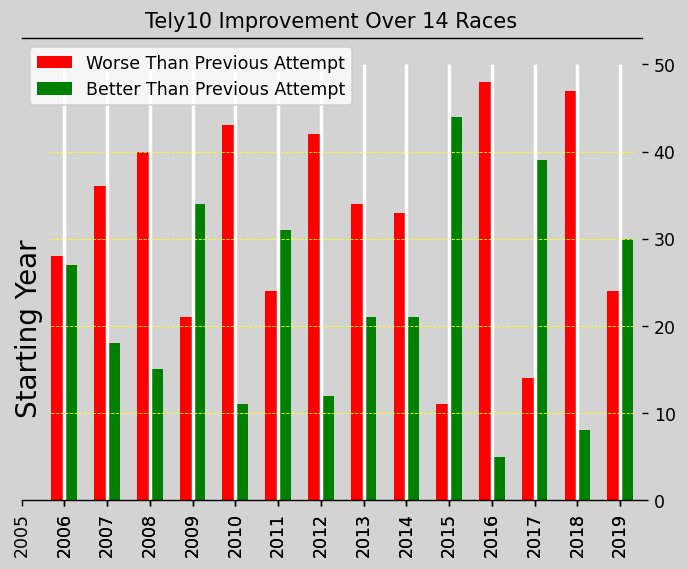

In [42]:
fig, ax = plt.subplots()
width=0.3

colors = ['red','green']
ax.bar(dffalse[''],dffalse['Count'], color=colors[0], width=-width, align='edge')
ax.bar(dftrue[''],dftrue['Count'], color=colors[1], width=width, align='edge')

ax.set_xticks(df2[''])
ax.set_xticklabels(df2[''],rotation=90)

ax.legend(['Worse Than Previous Attempt','Better Than Previous Attempt'],loc='upper left')
ax.set_ylim(0,df2['Count'].max())
ax.set_xlim(2005,2019.5)

ax.axes.get_yaxis().tick_right()

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("Tely10 Improvement Over 14 Races")

ax.text(2005.5, 30, 'Starting Year', ha='right', va='top', fontsize=16, color='black', rotation=90)

ax.hlines([10,20,30,40], 2005.7, 2019.3, color='yellow',linestyles='--', linewidth=0.5)
ax.vlines([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], 0, 50, color='white',linewidth=2)

ax.set_facecolor('lightgrey')
fig.set_facecolor('lightgrey')

fig.dpi = 125

In [43]:
dftrue = dftrue.sort_values(by='Count')
dftrue = dftrue.reset_index(drop=True)
dftrue.rename(columns={'' : 'Year'}, inplace=True)
dftrue

,Year,Better Than Previous Attempt,Count
0,2016,True,5
1,2018,True,8
2,2010,True,11
3,2012,True,12
4,2008,True,15
5,2007,True,18
6,2013,True,21
7,2014,True,21
8,2006,True,27
9,2019,True,30


In [44]:
dffalse = dffalse.reset_index(drop=True)
dffalse.rename(columns={'' : 'Year'}, inplace=True)
dffalse['normal'] = dffalse['Count']/dffalse['Count'].max()
dffalse['angle'] = (dffalse['Year']-2000)
dffalse

,Year,Better Than Previous Attempt,Count,normal,angle
0,2005,False,53,1.000000,5
1,2006,False,28,0.528302,6
2,2007,False,36,0.679245,7
3,2008,False,40,0.754717,8
4,2009,False,21,0.396226,9
5,2010,False,43,0.811321,10
6,2011,False,24,0.452830,11
7,2012,False,42,0.792453,12
8,2013,False,34,0.641509,13
9,2014,False,33,0.622642,14


In [45]:
dftrue['normal'] = dftrue['Count']/dftrue['Count'].max()
dftrue['angle'] = (dftrue['Year']-2000)
dftrue

,Year,Better Than Previous Attempt,Count,normal,angle
0,2016,True,5,0.113636,16
1,2018,True,8,0.181818,18
2,2010,True,11,0.250000,10
3,2012,True,12,0.272727,12
4,2008,True,15,0.340909,8
5,2007,True,18,0.409091,7
6,2013,True,21,0.477273,13
7,2014,True,21,0.477273,14
8,2006,True,27,0.613636,6
9,2019,True,30,0.681818,19


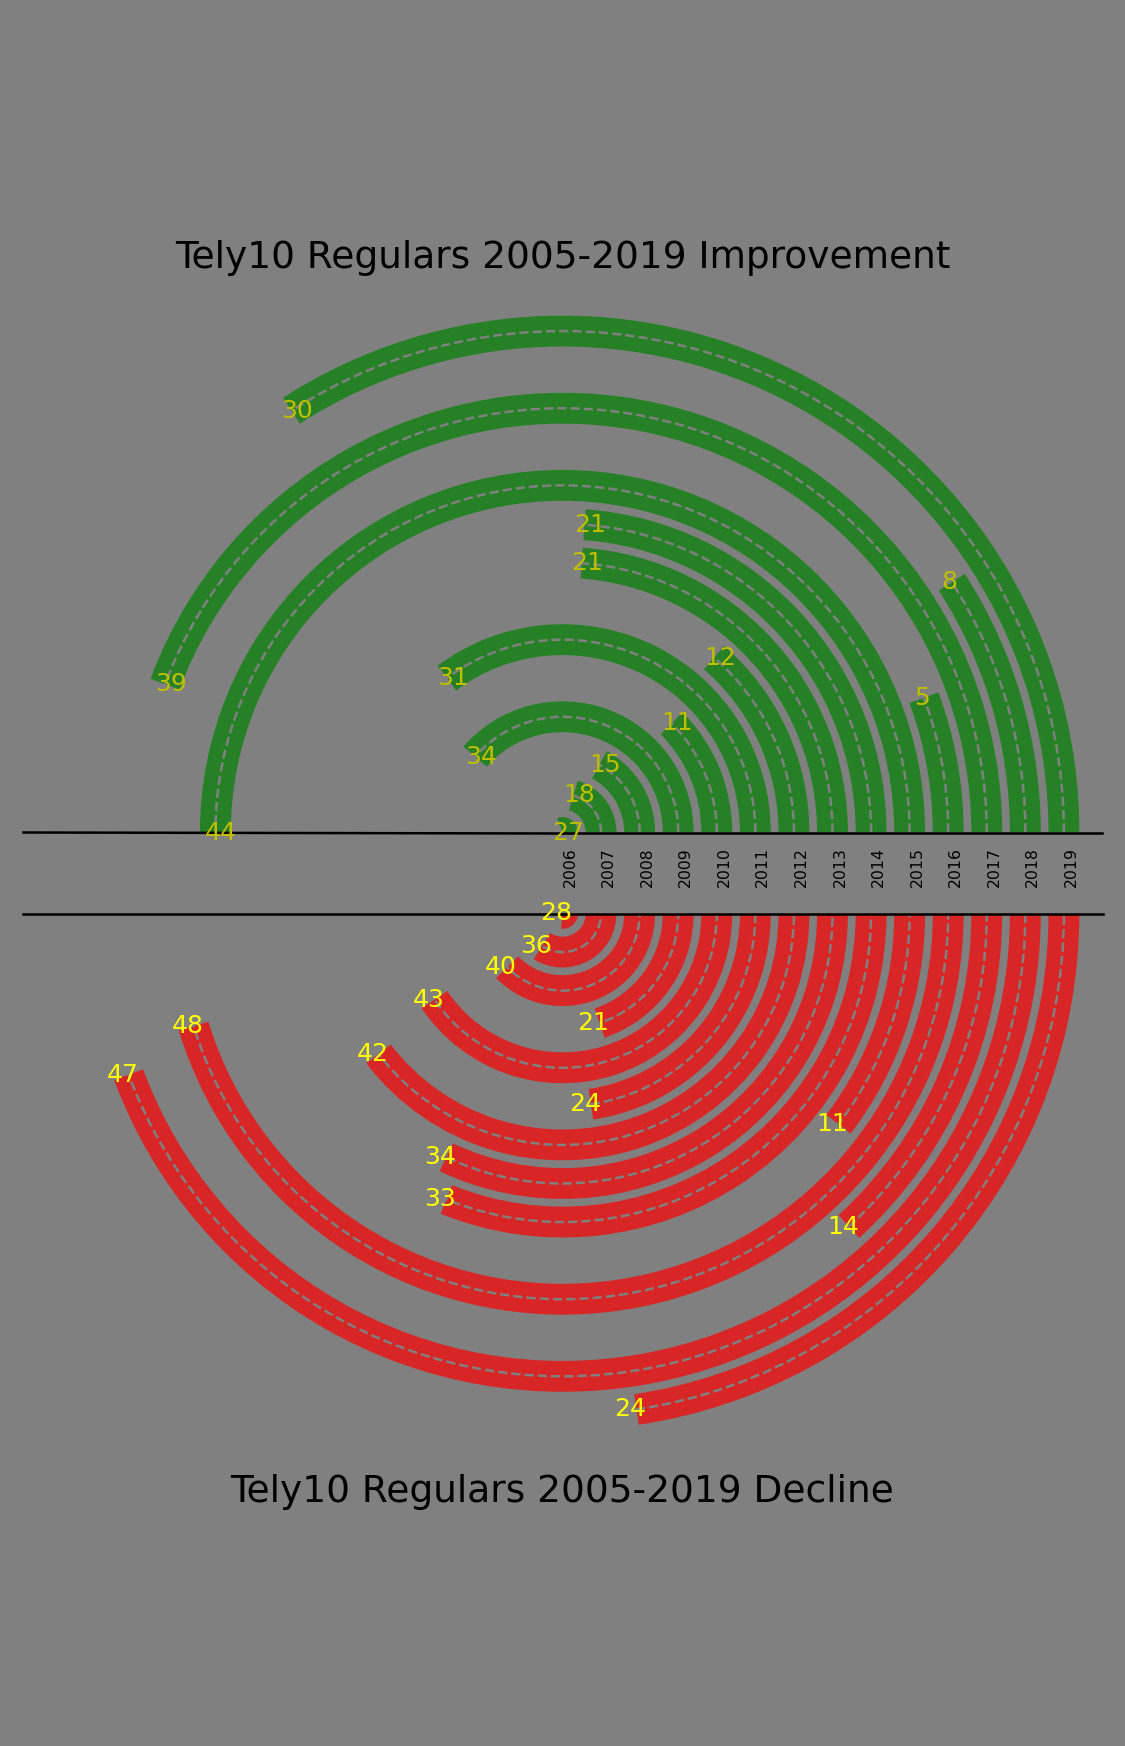

In [46]:
fig, (ax,ax2) = plt.subplots(1,2,subplot_kw={'projection': 'polar'})

ax.set_thetamin(0)
ax.set_thetamax(180)


ax.set_xticks(dftrue['normal']*np.pi)
ax.set_xticklabels(dftrue['Count'])
bars = ax.barh(dftrue['angle'],dftrue['normal']*np.pi, color='green', alpha=0.7)
ax.bar_label(bars, labels=dftrue['Count'], padding = -3.25, fontsize=8, color='y')

ax.set_yticks((dftrue['Year']-2000))
ax.set_yticklabels(dftrue['Year'])
ax.set_ylim((2006-2000),(dftrue['Year'].max()-2000+1))
ax.axes.yaxis.set_tick_params(labelrotation=90, labelsize=5, pad = 7.5)
ax.grid(linestyle='--', color='grey')
ax.xaxis.grid(False)
ax.set_xticklabels([])
ax.set_position([0.1,0.65,1,1])
ax.set_facecolor('grey')

#Bottom Half
ax2.set_thetamin(180)
ax2.set_thetamax(0)
ax2.set_theta_direction(-1)

ax2.set_xticks(dffalse['normal']*np.pi)
bars = ax2.barh(dffalse['angle'],dffalse['normal']*np.pi, color='red', alpha=0.7)
ax2.bar_label(bars, labels=dffalse['Count'], padding = -np.pi, fontsize=8, color = 'yellow')

ax2.set_yticks((dffalse['Year']-2000))
ax2.set_yticklabels([])
ax2.set_ylim((2006-2000),(dffalse['Year'].max()-2000+1))
ax2.grid(linestyle='--', color='grey')
ax2.xaxis.grid(False)
ax2.set_xticklabels([])
ax2.set_position([0.1,0.075,1,1])
ax2.set_facecolor('grey')

plt.title('Tely10 Regulars 2005-2019 Improvement', pad = 120)
ax.spines['polar'].set_visible(False)
ax2.spines['polar'].set_visible(False)
ax2.text(np.pi/2,21,'Tely10 Regulars 2005-2019 Decline', fontsize=12, ha='center', va='center')
fig.set_facecolor('grey')
fig.dpi = 225
